# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning (PEC)

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Nabil Ansari

**Student ID:** 202302040004

**Date of Submission:** 09/04/2025

**Group Members**: 1) Arya Sadalage<br>
                  2) Gourav Sable<br>
                  3) Nabil Ansari<br>

**Dataset Link :** https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [ ]:
#Code for Part 1
# Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load IMDB dataset
try:
    df = pd.read_csv('IMDB Dataset.csv')
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print("\nLabel distribution:")
    print(df['sentiment'].value_counts())
except FileNotFoundError:
    print("Error: IMDB Dataset.csv not found. Please upload the file to Colab.")
    raise

# Clean HTML tags and special characters
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text.lower()

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Enhanced preprocessing function
def preprocess_text(text):
    try:
        # Clean text
        text = clean_text(text)

        # Tokenization
        tokens = text.split()

        # Remove stopwords and short words
        tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

        # Lemmatization
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error processing text: {str(e)[:100]}...")
        return ""

# Apply preprocessing with progress bar
print("\nPreprocessing reviews...")
tqdm.pandas()
df['processed_review'] = df['review'].progress_apply(preprocess_text)

# Remove empty processed reviews
initial_count = len(df)
df = df[df['processed_review'].str.strip() != '']
print(f"\nRemoved {initial_count - len(df)} empty reviews after preprocessing")

# Vectorization
print("\nApplying vectorization techniques...")

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=list(stop_words),
    ngram_range=(1, 2)  # Include unigrams and bigrams
)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_review'])

# Count Vectorizer
count_vectorizer = CountVectorizer(
    max_features=5000,
    stop_words=list(stop_words),
    ngram_range=(1, 2)
)
X_count = count_vectorizer.fit_transform(df['processed_review'])

# Prepare labels (1 for positive, 0 for negative)
y = df['sentiment'].map({'positive': 1, 'negative': 0})

print("\nPreprocessing completed!")
print("TF-IDF shape:", X_tfidf.shape)
print("CountVectorizer shape:", X_count.shape)
print("\nSample processed review:")
print(df['processed_review'].iloc[0][:200], "...")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dataset loaded successfully!
Shape: (50000, 2)

Label distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Preprocessing reviews...


100%|██████████| 50000/50000 [00:29<00:00, 1692.44it/s]



Removed 0 empty reviews after preprocessing

Applying vectorization techniques...

Preprocessing completed!
TF-IDF shape: (50000, 5000)
CountVectorizer shape: (50000, 5000)

Sample processed review:
one reviewer mentioned watching episode youll hooked right exactly happened methe first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch  ...


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

Training set: 40000 samples
Test set: 10000 samples

Training Logistic Regression model...

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8873
Precision: 0.8801
Recall: 0.8988
F1 Score: 0.8893


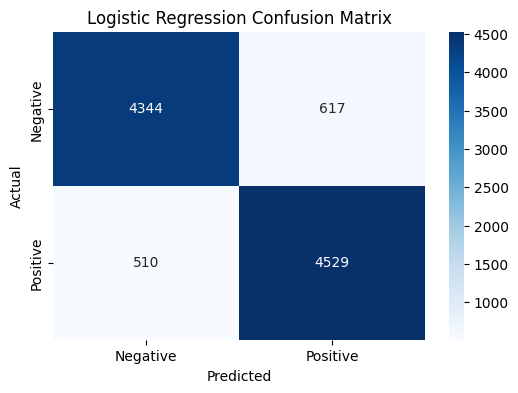


Training Naive Bayes model...

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy: 0.8574
Precision: 0.8499
Recall: 0.8708
F1 Score: 0.8602


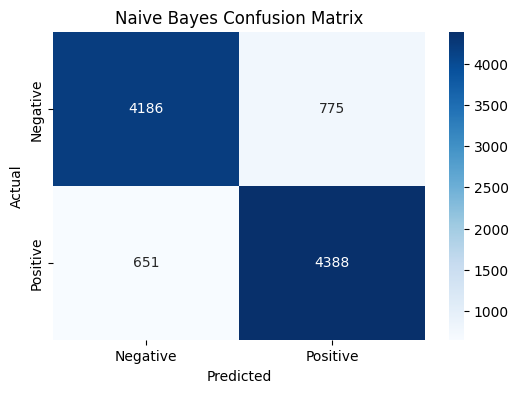


Training Logistic Regression with CountVectorizer features...

Logistic Regression (CountVectorizer) Performance:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4961
           1       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Accuracy: 0.8747
Precision: 0.8726
Recall: 0.8797
F1 Score: 0.8762


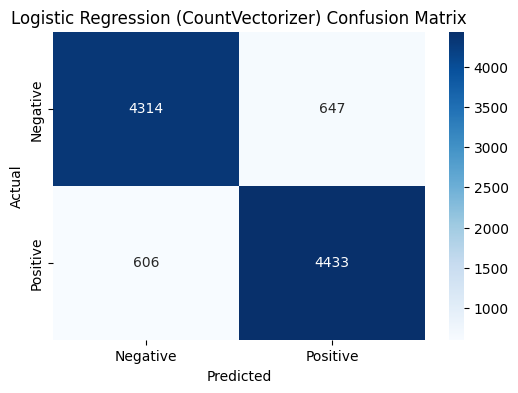


Model Performance Comparison:
| Model                                 |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------------------------------|-----------:|------------:|---------:|-----------:|
| Logistic Regression (TF-IDF)          |     0.8873 |    0.880101 | 0.898789 |   0.889347 |
| Naive Bayes (TF-IDF)                  |     0.8574 |    0.849893 | 0.870808 |   0.860223 |
| Logistic Regression (CountVectorizer) |     0.8747 |    0.872638 | 0.879738 |   0.876174 |


<Figure size 1000x600 with 0 Axes>

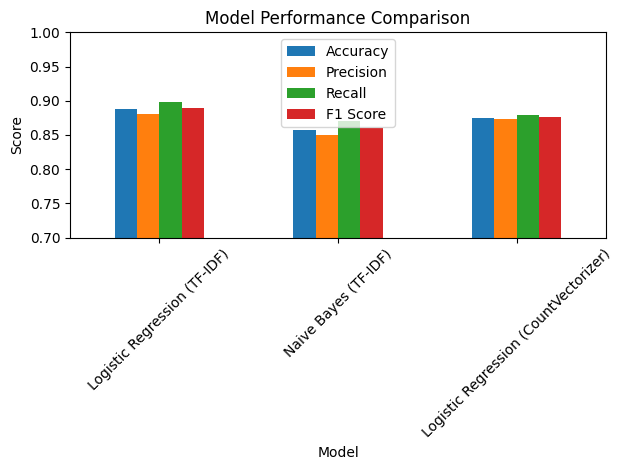

In [ ]:
#code for Part 2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, precision_score,
                           recall_score, f1_score, confusion_matrix,
                           classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# Split data (using TF-IDF features)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Function to evaluate and visualize model performance
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

# Logistic Regression Model
print("\nTraining Logistic Regression model...")
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)
lr_model.fit(X_train, y_train)
lr_metrics = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")

# Naive Bayes Model
print("\nTraining Naive Bayes model...")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_metrics = evaluate_model(nb_model, X_test, y_test, "Naive Bayes")

# Compare with CountVectorizer features
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(
    X_count, y, test_size=0.2, random_state=42)

print("\nTraining Logistic Regression with CountVectorizer features...")
lr_count_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)
lr_count_model.fit(X_train_count, y_train_count)
lr_count_metrics = evaluate_model(lr_count_model, X_test_count, y_test_count,
                                "Logistic Regression (CountVectorizer)")

# Create comparison table
results = pd.DataFrame({
    'Model': ['Logistic Regression (TF-IDF)', 'Naive Bayes (TF-IDF)',
              'Logistic Regression (CountVectorizer)'],
    'Accuracy': [lr_metrics['accuracy'], nb_metrics['accuracy'], lr_count_metrics['accuracy']],
    'Precision': [lr_metrics['precision'], nb_metrics['precision'], lr_count_metrics['precision']],
    'Recall': [lr_metrics['recall'], nb_metrics['recall'], lr_count_metrics['recall']],
    'F1 Score': [lr_metrics['f1'], nb_metrics['f1'], lr_count_metrics['f1']]
})

print("\nModel Performance Comparison:")
print(results.to_markdown(index=False))

# Visualize model comparison
plt.figure(figsize=(10, 6))
results.set_index('Model').plot(kind='bar', rot=45)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Nabil Ansari, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [https://github.com/nabil-repo/DL]

Signature: Nabil Aman Aasif Ahmad Ansari


**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion